<h1 align="center"><font size="7"><strong>Final Project 3</strong></font></h1>

------------------------------------------------

# Kelompok 2 - PYTN KS 019
Ahmat Zainul Muttaqin

### Latar Belakang

Penyakit kardiovaskular (CVD) merupakan penyebab utama kematian di seluruh dunia, memakan korban sekitar 17,9 juta jiwa setiap tahunnya, menyumbang sebanyak 31% dari total kematian global. Kegagalan jantung, yang sering kali dipicu oleh CVD, menjadi peristiwa umum yang dihadapi, dan dataset ini memuat 12 fitur yang berguna untuk meramalkan kematian akibat kegagalan jantung.

Upaya pencegahan penyakit kardiovaskular sebagian besar dapat dilakukan dengan mengatasi perilaku berisiko, seperti penggunaan tembakau, pola makan yang tidak sehat, obesitas, serta mengelola aktivitas fisik dan konsumsi alkohol berisiko, melalui strategi yang diimplementasikan secara luas di populasi.

Individu yang menderita penyakit kardiovaskular atau memiliki risiko tinggi untuk mengembangkan penyakit ini (karena keberadaan satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau kondisi medis lainnya) membutuhkan pendeteksian dini dan manajemen yang efektif, di mana penggunaan model pembelajaran mesin dapat memberikan kontribusi yang signifikan.

### Dataset

Analisis ini memanfaatkan dataset yang diperoleh dari Kaggle dengan judul ["Heart Failure Prediction"](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).
Dataset ini mengandung informasi mengenai faktor-faktor yang berhubungan dengan kematian akibat gagal jantung, dan terdiri dari 13 atribut dengan 299 baris data. Atribut yang dijadikan target dalam analisis ini adalah atribut Death Event/Kematian, sementara atribut-atribut lainnya berfungsi sebagai prediktor.

### Objektif yang ingin dicapai

Objective yang ingin dicapai dalam analisis ini yaitu:
1. **Identifikasi Faktor Pengaruh:**
   - Menganalisis dataset untuk menentukan faktor-faktor yang memiliki pengaruh signifikan dalam memprediksi kematian akibat penyakit gagal jantung. Hal ini dapat membantu dalam pemahaman mendalam tentang variabel-variabel yang paling relevan dalam konteks prediksi kematian.

2. **Pengembangan Model Ensemble:**
   - Membangun model prediksi kematian menggunakan metode ensemble. Metode ensemble melibatkan penggabungan hasil beberapa model untuk meningkatkan kinerja prediksi. Dengan demikian, analisis ini bertujuan untuk mengoptimalkan prediksi kematian dengan memanfaatkan kombinasi model yang beragam.

## Import Libraries

Melakukan import libraries yang digunakan dalam project ini

In [1]:
# Mengaktifkan fungsi agar visualisasi matplotlib dapat langsung ditampilkan di notebook jika Anda menggunakan Jupyter Notebook.
%matplotlib inline
import pandas as pd              # Menggunakan pandas untuk manipulasi dan analisis data.
import numpy as np               # Digunakan untuk operasi matematika pada array.
import matplotlib.pyplot as plt  # Library untuk visualisasi data.
import seaborn as sns            # Membuat visualisasi data yang lebih menarik dan informatif.
from sklearn.model_selection import train_test_split  # Memisahkan dataset menjadi data latih dan uji.
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier  # Model ensemble yang akan digunakan.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score  # Metrik evaluasi model.
import pickle                    # Menggunakan pickle untuk menyimpan model yang telah dilatih.

print('Libraries siap untuk digunakan!')

Libraries siap untuk digunakan!


## Data Loading

Memuat dataset dengan menggunakan library Pandas.

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Mengatur opsi untuk menampilkan semua kolom dalam DataFrame

In [3]:
pd.set_option("display.max_columns", None)

Menampilkan beberapa baris pertama dari dataset tanpa batasan kolom

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Menampilkan 5 baris terbawah dari dataset

In [5]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


Menampilkan informasi kolom, baris, dan tipe data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dataset ini mengandung sejumlah baris, tepatnya sebanyak 299 baris, dan menampilkan variasi tipe data, melibatkan kombinasi tipe float dan integer.

Menampilkan matriks dataset menggunakan [.shape]()

Terlihat dataset memiliki 299 baris dan 13 kolom

In [7]:
df.shape

(299, 13)

Menampilkan nama kolom dengan menggunakan [.columns]()

In [8]:
df.columns
print("Nama-nama kolom dalam dataset:")
for column in df.columns:
    print(column)

Nama-nama kolom dalam dataset:
age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT


Mengecek missing value dengan [.isnull()]() serta menjumlahkannya dengan menambah [.sum]()

In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Diperoleh bahwa tidak terdapat missing value pada semua atribut.

Memanfaatkan fungsi [.describe()]() guna memeriksa statistik deskriptif dari setiap atribut yang berjenis numerik.

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Melihat banyaknya unique values untuk tiap atribut.

In [11]:
for col in df.columns:
    print(col,': ', df[col].nunique())

age :  47
anaemia :  2
creatinine_phosphokinase :  208
diabetes :  2
ejection_fraction :  17
high_blood_pressure :  2
platelets :  176
serum_creatinine :  40
serum_sodium :  27
sex :  2
smoking :  2
time :  148
DEATH_EVENT :  2


## Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut.Bagian ini mencakup langkah-langkah penyiapan data dengan melakukan pembersihan data sebelum melanjutkan eksplorasi lebih lanjut.

Melakukan pengecekan duplikasi data.

Diperoleh tidak ada duplikasi data.

In [12]:
df.duplicated().sum()

0

Melakukan pengecekan missing value pada atribut DEATH EVENT.

Diperoleh bahwa tidak terdapat missing value.

In [13]:
df['DEATH_EVENT'].isnull().sum()

0

Melakukan crosstab atribut smoking dan Death Event

([<matplotlib.axis.XTick at 0x17a87369c10>,
 [Text(0, 0, 'Tidak Merokok'), Text(1, 0, 'Merokok')])

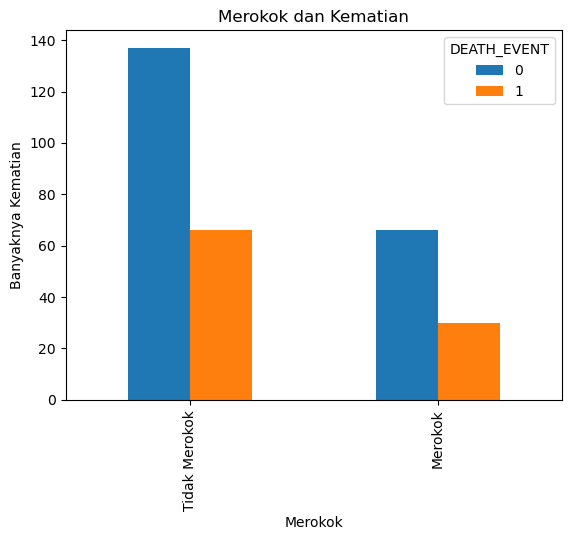

In [14]:
pd.crosstab(df.smoking, df.DEATH_EVENT).plot(kind='bar')
plt.ylabel('Banyaknya Kematian')
plt.xlabel('Merokok')
plt.title('Merokok dan Kematian')
plt.xticks(ticks=(0,1),labels=['Tidak Merokok','Merokok'])

Diperoleh hasil bahwa jumlah pasien merokok yang meninggal paling sedikit dibandingkan perbandingan yang lain

Memberikan nama baru untuk setiap atribut.

In [15]:
df2 = df.rename(columns={'age':'Usia', 'anaemia':'Anaemia','creatinine_phosphokinase':'Kreatinin_fosfokinase', 'diabetes':'Diabetes',
                         'ejection_fraction':'Fraksi_ejeksi', 'high_blood_pressure':'Tekanan_darah_tinggi','platelets':'Platelets', 
                        'serum_creatinine':'Kreatinin_serum', 'serum_sodium':'Sodium_serum','sex':'Gender','smoking':'Perokok', 
                         'time':'Waktu', 'DEATH_EVENT':'Kematian'})

Menghapus atribut Waktu karena tidak memiliki relevansi dengan variabel target. Atribut Waktu mencerminkan lamanya kelangsungan hidup pasien, sehingga tidak sesuai sebagai variabel independen, melainkan lebih cocok sebagai variabel target (dalam konteks lain).

In [16]:
df2.drop(columns=['Waktu'], inplace=True)

In [17]:
df2.head()

,Usia,Anaemia,Kreatinin_fosfokinase,Diabetes,Fraksi_ejeksi,Tekanan_darah_tinggi,Platelets,Kreatinin_serum,Sodium_serum,Gender,Perokok,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


Melihat banyaknya nilai dari masing-masing atribut

In [18]:
for col in df2.columns:
    print(col,': ')
    print(df2[col].value_counts())
    print("  ")
    print("  ")

Usia : 
Usia
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: count, dtype: int64
  
  
Anaemia : 
Anaemia
0    170
1    129
Name: count, dtype: int64
  
  
Kreatinin_fosfokinase : 
Kreatinin_fosfokinase
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: count, Length: 208, dtype: int64
  
  
Diabetes : 
Diabetes
0    174
1    125
Name: count, dtype: int

Membentuk dataframe yang serupa dengan dataframe sebelumnya.

In [19]:
df3 = df2.copy()

Melihat 5 baris teratas dari dataset terbaru

In [20]:
df3.head()

,Usia,Anaemia,Kreatinin_fosfokinase,Diabetes,Fraksi_ejeksi,Tekanan_darah_tinggi,Platelets,Kreatinin_serum,Sodium_serum,Gender,Perokok,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


## Exploratory Data Analysis

### Descriptive Statistics & Query

Melihat statistik descriptif pada data numerik

In [21]:
num = df3.drop(columns=['Anaemia', 'Diabetes', 'Tekanan_darah_tinggi', 'Gender', 'Perokok', 'Kematian'])
num.describe()

,Usia,Kreatinin_fosfokinase,Fraksi_ejeksi,Platelets,Kreatinin_serum,Sodium_serum
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000


Ditemukan bahwa:
- Rata-rata usia pasien berkisar 60 tahun.
- Nilai rata-rata kreatinin fosfokinase pada pasien adalah 581,84.
- Fraksi ejeksi maksimal yang tercatat pada pasien mencapai 80.
- Kreatinin serum minimal yang terdapat pada pasien adalah 0,5.
- Rata-rata sodium serum pada pasien adalah 136,63.

Selanjutnya melihat statistik descriptif pada data kategorik

In [22]:
kat = df3.drop(columns=['Usia', 'Kreatinin_fosfokinase', 'Fraksi_ejeksi', 'Platelets', 'Kreatinin_serum', 'Sodium_serum']).astype('category')
kat.describe()

,Anaemia,Diabetes,Tekanan_darah_tinggi,Gender,Perokok,Kematian
count,299,299,299,299,299,299
unique,2,2,2,2,2,2
top,0,0,0,1,0,0
freq,170,174,194,194,203,203


Data menunjukkan bahwa:
- Jumlah pasien yang tidak mengidap anemia adalah 170 orang.
- Terdapat 174 pasien yang tidak menderita diabetes.
- Sebanyak 194 pasien tidak mengalami tekanan darah tinggi.
- Jumlah pasien yang tidak merokok adalah 203 orang.
- Seluruhnya, 203 pasien tidak mengalami kematian.

Selanjutnya, melakukan grouping pada atribut Usia dan Kematian untuk melihat rata-ratanya

In [23]:
mean1 = df3[['Usia','Kematian']].groupby('Kematian').mean().sort_values(by='Usia', ascending=True)
mean1

,Usia
Kematian,
0,58.761906
1,65.215281


Didapatkan informasi bahwa rata-rata usia pasien yang meninggal adalah 65 tahun, sementara rata-rata usia pasien yang tidak meninggal atau bertahan adalah 58 tahun.

Berikutnya, melakukan crosstab pada atribut Perokok dan Kematian untuk melihat proporsi dalam dataset.

In [24]:
pd.crosstab(df3.Perokok, df3.Kematian)

Kematian,0,1
Perokok,,
0,137,66
1,66,30


Berdasarkan hasil crosstab, dapat dilihat bahwa terdapat 30 pasien yang merokok dan mengalami kematian. Sementara itu, proporsi pasien yang merokok dan dapat bertahan, serta yang tidak merokok namun mengalami kematian, sama-sama sebanyak 66 pasien. Pasien yang tidak merokok dan tidak mengalami kematian memiliki jumlah terbanyak, yakni 137 pasien.

### Boxplot

Melakukan visualisasi Boxplot untuk melihat distribusi data, outlier data

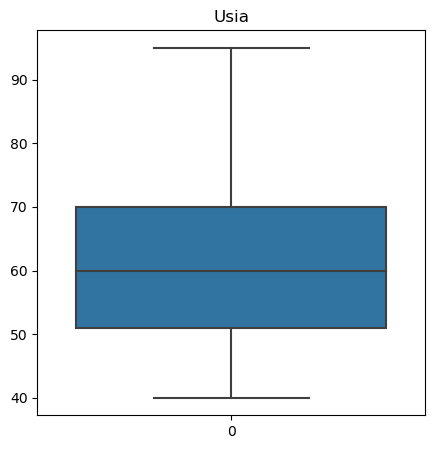

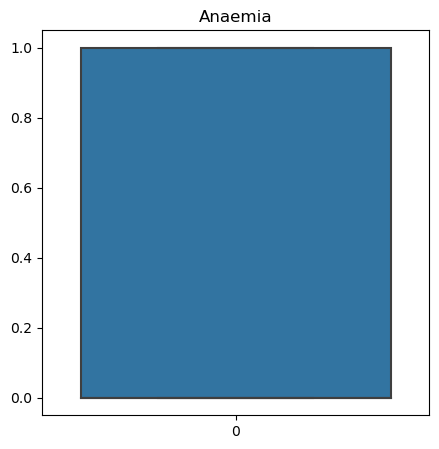

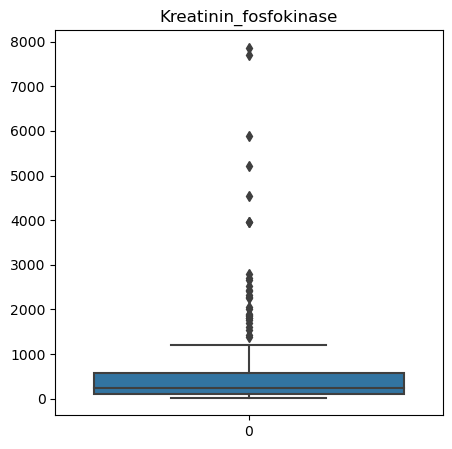

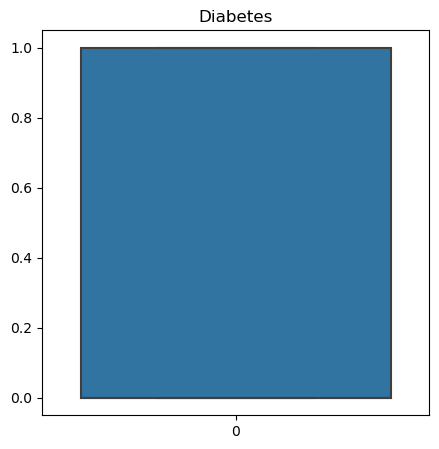

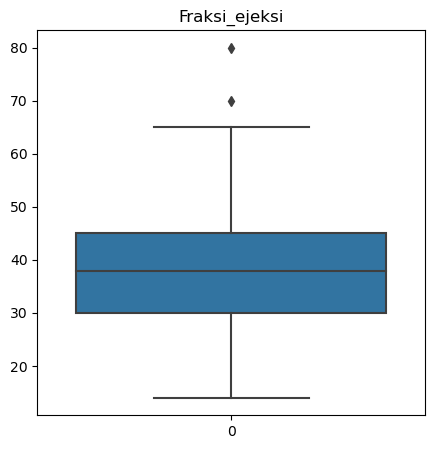

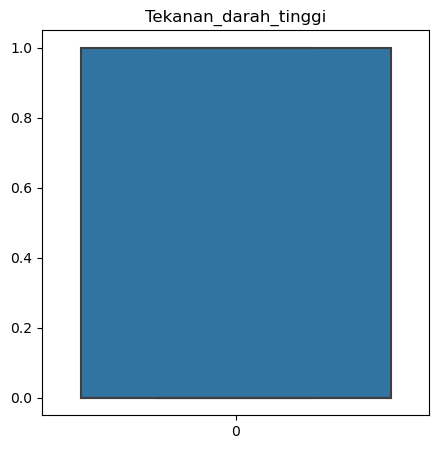

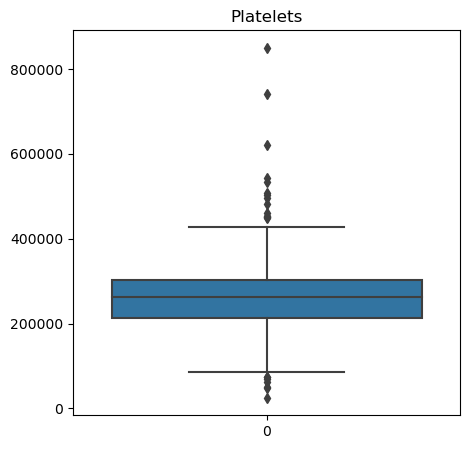

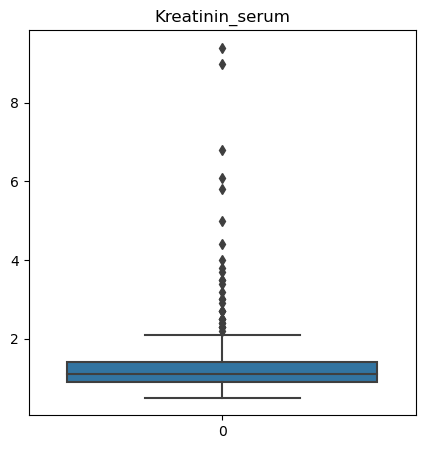

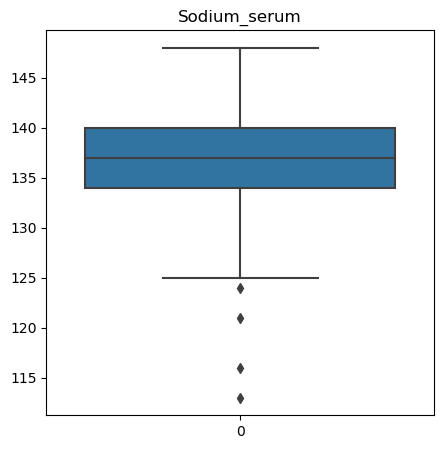

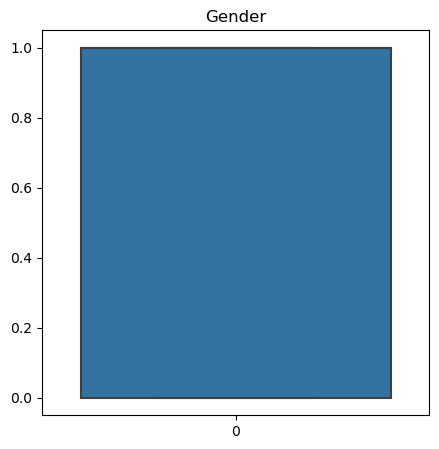

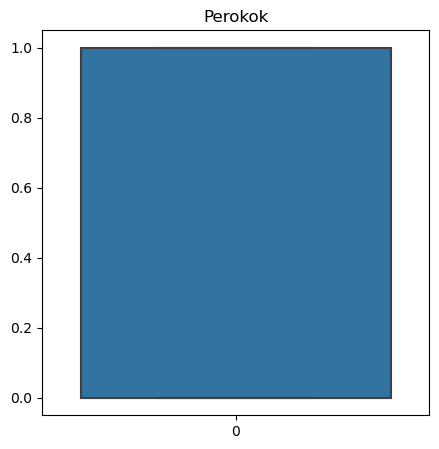

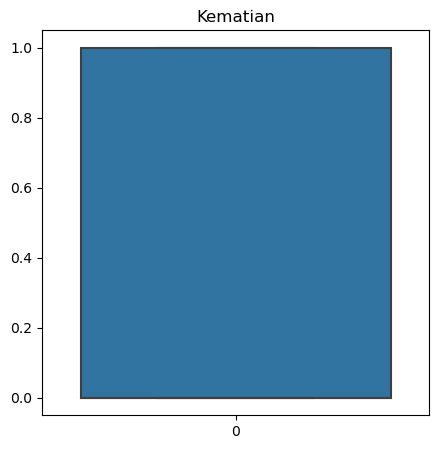

In [25]:
for feature in df3:
    plt.figure(figsize=(5,5))
    sns.boxplot(df3[feature])
    plt.title(feature)

Diperoleh bahwa masih terdapat atribut dengan nilai outlier yang banyak.

### Histogram

Selanjutnya melakukan visualisasi histogram untuk melihat proporsi data.

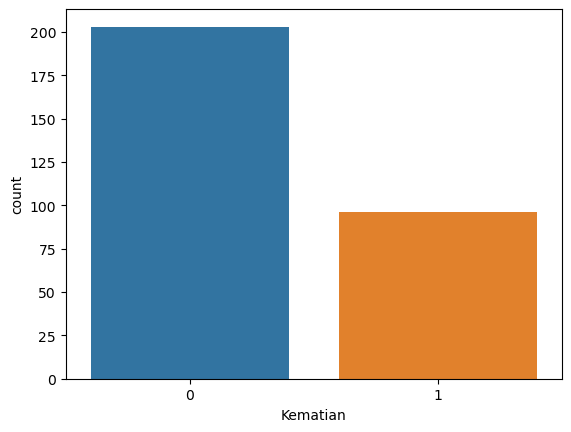

In [26]:
sns.countplot(x="Kematian", data=df3)
plt.show()

Diperoleh bahwa proporsi data antara pasien yang meninggal maupun yang tidak adalah tidak berbeda signifikan.

### Correlation Matrix

Melakukan visualisasi korelasi antar variabel untuk melihat hubungan.

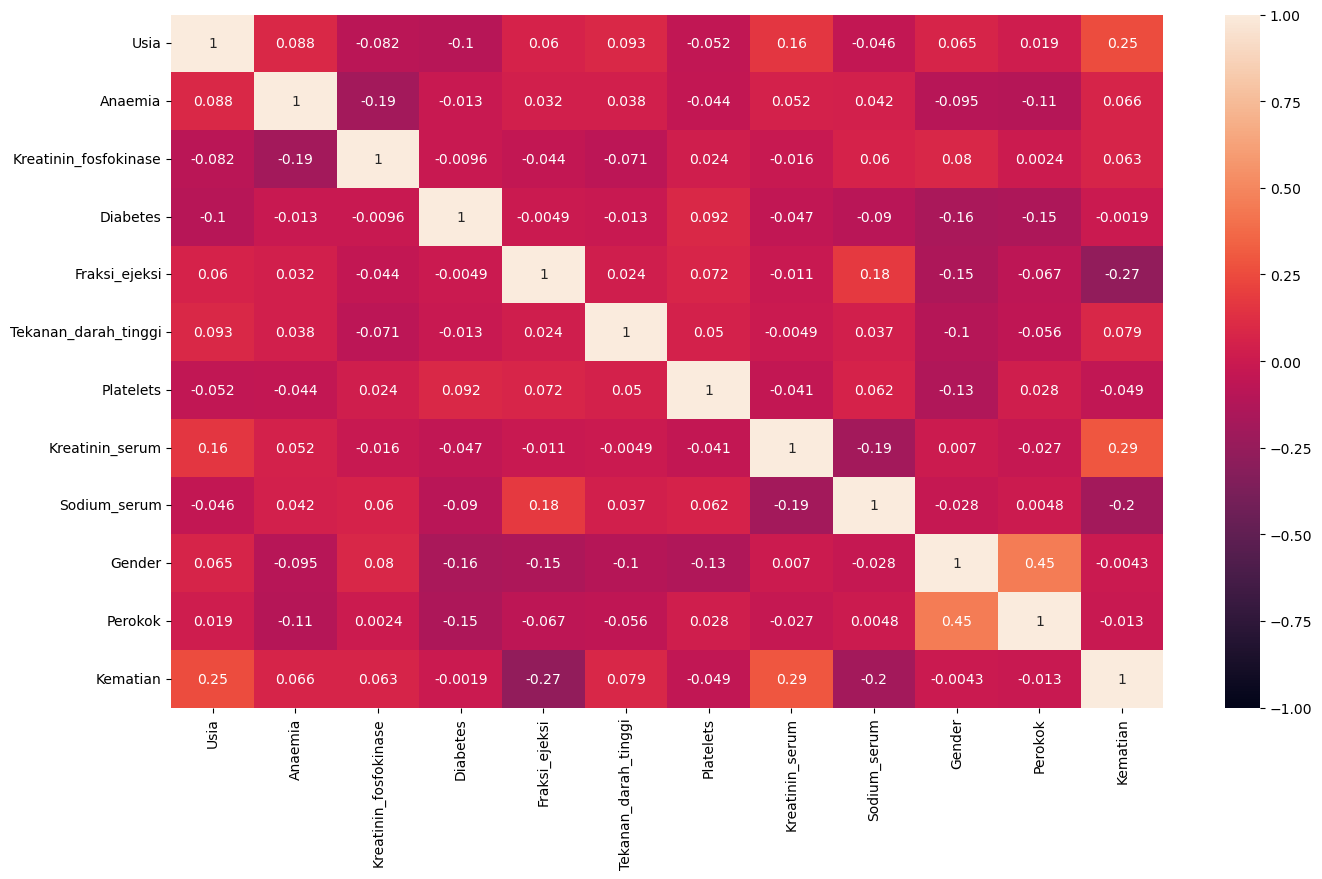

In [27]:
plt.figure(figsize=(16, 9))
sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [28]:
df3.corr()['Kematian'].sort_values(ascending=False)

Kematian                 1.000000
Kreatinin_serum          0.294278
Usia                     0.253729
Tekanan_darah_tinggi     0.079351
Anaemia                  0.066270
Kreatinin_fosfokinase    0.062728
Diabetes                -0.001943
Gender                  -0.004316
Perokok                 -0.012623
Platelets               -0.049139
Sodium_serum            -0.195204
Fraksi_ejeksi           -0.268603
Name: Kematian, dtype: float64

Ditemukan bahwa:
- Empat atribut dengan korelasi tertinggi adalah kreatinin serum, usia, fraksi ejeksi, dan sodium serum.
- Korelasi antara fraksi ejeksi dan sodium serum dengan Kematian bersifat negatif.
- Sebaliknya, korelasi antara kreatinin serum dan usia dengan Kematian bersifat positif.

## Data Preprocessing

Melakukan inisiasi variabel X dan Y

In [29]:
X = df3.drop(['Kematian'], axis=1)
y = df3['Kematian']
print(X.shape)
print(y.shape)

(299, 11)
(299,)


### Feature Selection

Menerapkan seleksi fitur menggunakan SequentialFeatureSelector dari pustaka dengan menggunakan metode Regresi Linier, dengan jumlah fitur sebanyak 10, metode penambahan fitur ke depan (forward), evaluasi berdasarkan R-squared, dan validasi silang (cross-validation) dengan k=3.

In [30]:
et=ExtraTreesClassifier()
et.fit(X,y)

ExtraTreesClassifier()

Diperoleh hasil dengan 10 feature/atribut yang paling berpengaruh dalam model

In [31]:
et.feature_importances_

array([0.14553583, 0.03112538, 0.11193585, 0.043603  , 0.18025213,
       0.0279761 , 0.10254165, 0.16735154, 0.11748065, 0.03276099,
       0.03943689])

Selain itu juga melakukan feature selection menggunakan library F regression dengan k=10

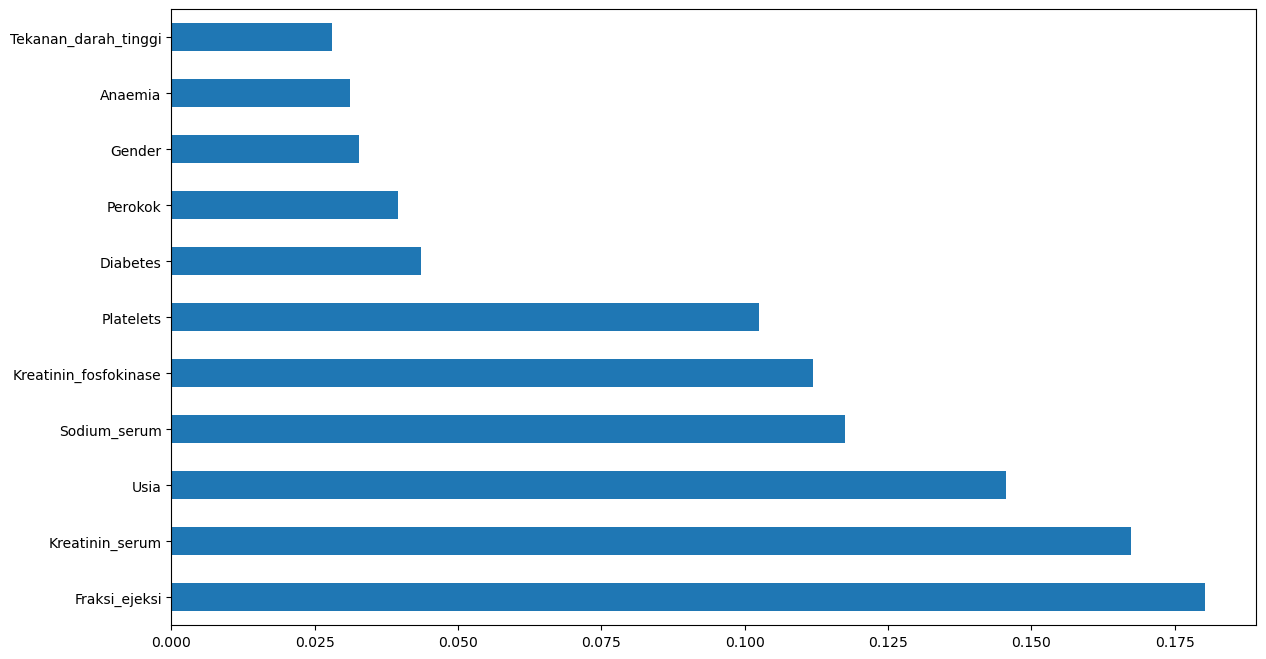

In [32]:
plt.figure(figsize=(14,8))
feat_importances=pd.Series(et.feature_importances_,index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()


Setelah menentukan fitur-fitur yang paling berpengaruh pada model melalui kedua uji seleksi fitur yang telah dilakukan, dilakukan inisiasi akhir pada variabel X yang akan digunakan sebagai data pelatihan. Dalam konteks ini, dipilih 4 atribut yang memiliki pengaruh signifikan, yaitu Kreatinin serum, fraksi ejeksi, usia, dan sodium serum.

In [33]:
X_fit = df3[['Usia', 'Fraksi_ejeksi', 'Kreatinin_serum', 'Sodium_serum']]

Melihat 5 baris teratas dari dataframe X_fit

In [34]:
X_fit.head()

,Usia,Fraksi_ejeksi,Kreatinin_serum,Sodium_serum
0,75.0,20,1.9,130
1,55.0,38,1.1,136
2,65.0,20,1.3,129
3,50.0,20,1.9,137
4,65.0,20,2.7,116


Melihat rincian dataframe X_fit, yakni memiliki tipe data numerik

In [35]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Usia             299 non-null    float64
 1   Fraksi_ejeksi    299 non-null    int64  
 2   Kreatinin_serum  299 non-null    float64
 3   Sodium_serum     299 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


Melihat dimensi X_fit, yakni memiliki 299 baris dan 4 kolom.

In [36]:
X_fit.shape

(299, 4)

Setelah diperoleh atribut yang akan dilakukan training, kemudian membagi data menjadi Training dan Testing dengan proporsi 0.8 dan 0.2

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fit, y, test_size=0.30, random_state=325)

## Model Defining

Pengujian pada pelatihan ini menggunakan tiga metode klasifikasi, yaitu Random Forest Classifier, Extra Tree Classifier, dan Gradient Boosting Classifier. Pemilihan metode ini didasarkan pada jenis data prediksi yang bersifat kategorikal, sehingga metode tersebut dianggap cocok untuk digunakan.

Model pertama adalah model Random Forest Classifier dengan menggunakan 10 estimator, kedalaman maksimum (max depth) sebesar 10, dan minimum samples split sebesar 2.

In [38]:
clf1 = RandomForestClassifier(n_estimators=10, max_depth=10,min_samples_split=2, random_state=0)

Model kedua merupakan model Extra Tree Classifier dengan konfigurasi 10 estimator, kedalaman maksimum (max depth) sebesar 5, dan minimum samples split sebesar 3.

In [39]:
clf2 = ExtraTreesClassifier(n_estimators=10, max_depth=5, min_samples_split=3, random_state=1)

Model ketiga adalah model Gradient Boosting Classifier dengan menggunakan 100 estimator, learning rate sebesar 0.1, dan kedalaman maksimum (max depth) sebesar 1.

In [40]:
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                  max_depth=1, random_state=3)

## Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [41]:
model1 = clf1.fit(X_train, y_train)

In [42]:
model2 = clf2.fit(X_train, y_train)

In [43]:
model3 = clf3.fit(X_train, y_train)

## Model Evaluation

Pada tahap ini, dilakukan evaluasi model yang bertujuan untuk menunjukkan performa model berdasarkan metrik-metrik yang telah dipilih.

### Random Forest Classifier

In [44]:
y_pred1 = clf1.predict(X_test)
print("Test score:", clf1.score(X_test, y_test))
print("Train score:", clf1.score(X_train, y_train))

Test score: 0.6777777777777778
Train score: 0.9712918660287081


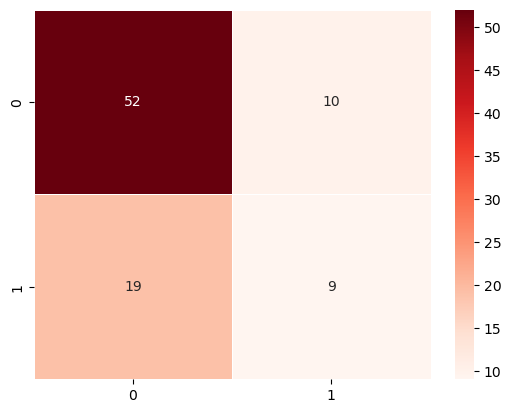

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        62
           1       0.47      0.32      0.38        28

    accuracy                           0.68        90
   macro avg       0.60      0.58      0.58        90
weighted avg       0.65      0.68      0.66        90



In [45]:
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()
print(classification_report(y_test, y_pred1))

In [46]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred1))
print('Presisi :', precision_score(y_test,y_pred1))
print('Recall :', recall_score(y_test,y_pred1))
print('F1 Score :', f1_score(y_test,y_pred1))

Ringkasan Evaluasi Model
Akurasi : 0.6777777777777778
Presisi : 0.47368421052631576
Recall : 0.32142857142857145
F1 Score : 0.3829787234042553


### Extra Tree Classifier

In [47]:
y_pred2 = clf2.predict(X_test)
print("Test score:", clf2.score(X_test, y_test))
print("Train score:", clf2.score(X_train, y_train))

Test score: 0.6666666666666666
Train score: 0.8421052631578947


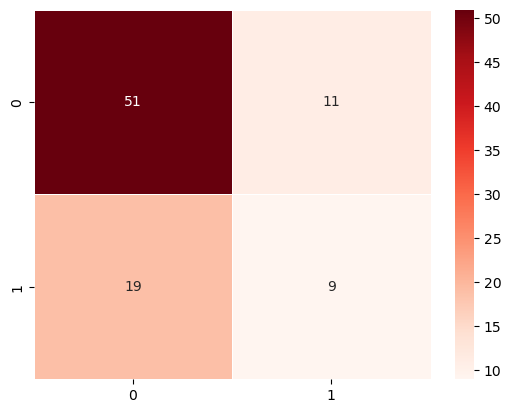

              precision    recall  f1-score   support

           0       0.73      0.82      0.77        62
           1       0.45      0.32      0.38        28

    accuracy                           0.67        90
   macro avg       0.59      0.57      0.57        90
weighted avg       0.64      0.67      0.65        90



In [48]:
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()
print(classification_report(y_test, y_pred2))

In [49]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred2))
print('Presisi :', precision_score(y_test,y_pred2))
print('Recall :', recall_score(y_test,y_pred2))
print('F1 Score :', f1_score(y_test,y_pred2))

Ringkasan Evaluasi Model
Akurasi : 0.6666666666666666
Presisi : 0.45
Recall : 0.32142857142857145
F1 Score : 0.375


### Gradient Boosting Classifier

In [50]:
y_pred3 = clf3.predict(X_test)
print("Test score:", clf3.score(X_test, y_test))
print("Train score:", clf3.score(X_train, y_train))

Test score: 0.7111111111111111
Train score: 0.8277511961722488


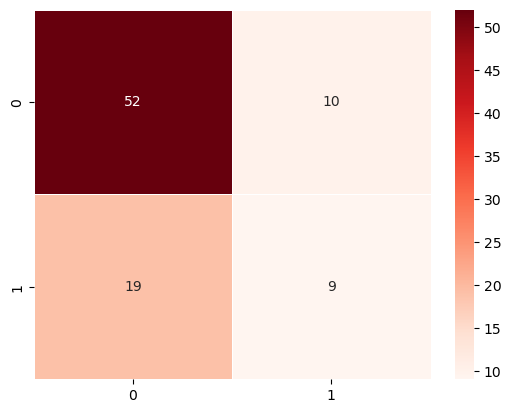

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        62
           1       0.55      0.39      0.46        28

    accuracy                           0.71        90
   macro avg       0.65      0.62      0.63        90
weighted avg       0.69      0.71      0.70        90



In [51]:
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()
print(classification_report(y_test, y_pred3))

In [52]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred3))
print('Presisi :', precision_score(y_test,y_pred3))
print('Recall :', recall_score(y_test,y_pred3))
print('F1 Score :', f1_score(y_test,y_pred3))

Ringkasan Evaluasi Model
Akurasi : 0.7111111111111111
Presisi : 0.55
Recall : 0.39285714285714285
F1 Score : 0.45833333333333337


Diperoleh hasil evaluasi sebagai berikut:
- Model ketiga menunjukkan performa paling baik dibandingkan dengan kedua model lainnya.
- Model pertama dan kedua mengindikasikan adanya overfitting.

## Model Inference

Bagian ini diisi dengan pengujian model (inference), di mana model yang telah dilatih akan diuji pada data selain data yang telah digunakan dalam pelatihan. Data yang digunakan dapat berupa data buatan oleh student atau data yang ditemukan di internet.

In [53]:
X_new = {'Usia':[50,55,60], 'Fraksi_ejeksi':[35,30,25], 'Kreatinin_serum':[1.25,2,3], 'Sodium_serum':[130,133,136]}
X_new = pd.DataFrame(X_new)

Melakukan prediksi pada data baru

In [54]:
y_pred_new = clf3.predict(X_new)
print('Prediksi Pasien yaitu: ')
print(y_pred_new)

Prediksi Pasien yaitu: 
[0 1 1]


## Conclusions

Dari hasil analisis yang telah dilakukan, dapat disimpulkan sebagai berikut:
- Terdapat 13 atribut yang diasumsikan memengaruhi kematian. Setelah analisis, dipilih 4 atribut/faktor yang paling signifikan dalam model.
- Faktor-faktor yang memiliki pengaruh signifikan terhadap kematian pasien gagal jantung adalah Usia, Fraksi Ejeksi, Kreatinin Serum, dan Sodium Serum.
- Model ensemble yang paling optimal adalah model ketiga, dengan akurasi pengujian sebesar 71%.

In [55]:
pickle.dump(clf3, open('modelfp3.pkl','wb'))